In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/amh.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/ptbr.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/eng.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/rus.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/deu.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/afr.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/amh.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/ptbr.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/eng.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/som.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/oro.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/sun.csv
/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_a/tir.c

# Import Libraries and Tools

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [35]:
train_rus = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/rus.csv")
train_deu = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/deu.csv")
train_ptbr = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/ptbr.csv")
train_eng = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/train/track_b/eng.csv")


dev_rus = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/dev/track_b/rus_b.csv")
dev_deu = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/dev/track_b/deu_b.csv")
dev_ptbr = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/dev/track_b/ptbr_b.csv")
dev_eng = pd.read_csv("/kaggle/input/semeval-2025-task-11-emotion/public_data/dev/track_b/eng_b.csv")

In [3]:
train_rus.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,rus_train_track_b_00001,"Планы могут меняться и к лучшему, так? Утомите...",0,0,0,0,0,0
1,rus_train_track_b_00002,"Вы все еще можете ресегментировать рынок, но с...",0,0,0,0,0,0
2,rus_train_track_b_00003,согласна((( жалко очень,0,0,0,0,2,0
3,rus_train_track_b_00004,"ну вас нахуй, я уебываю",3,0,0,0,0,0
4,rus_train_track_b_00005,снег пошел... вечером уборкой заниматься в наш...,0,0,0,0,2,0


In [4]:
train_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2220 non-null   object
 1   text      2220 non-null   object
 2   Anger     2220 non-null   int64 
 3   Disgust   2220 non-null   int64 
 4   Fear      2220 non-null   int64 
 5   Joy       2220 non-null   int64 
 6   Sadness   2220 non-null   int64 
 7   Surprise  2220 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.9+ KB


In [36]:
dev_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        343 non-null    object 
 1   text      343 non-null    object 
 2   Anger     0 non-null      float64
 3   Disgust   0 non-null      float64
 4   Fear      0 non-null      float64
 5   Joy       0 non-null      float64
 6   Sadness   0 non-null      float64
 7   Surprise  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 21.6+ KB


In [37]:
dev_rus.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,rus_dev_track_b_00001,"Как скучно мы гуляем, у меня болиит голова:(((",NaN,NaN,NaN,NaN,NaN,NaN
1,rus_dev_track_b_00002,"Надоело такое отнашение ко мне,мне даже противно",NaN,NaN,NaN,NaN,NaN,NaN
2,rus_dev_track_b_00003,"и правильно, не болей т т я не знаю, как подде...",NaN,NaN,NaN,NaN,NaN,NaN
3,rus_dev_track_b_00004,господи. мне страшно жить в своем собственном ...,NaN,NaN,NaN,NaN,NaN,NaN
4,rus_dev_track_b_00005,"Если вы хотите бесплатно общаться,предлагаем в...",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_deu.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,deu_train_track_b_00001,"Nur weil der Arzt jung war, kann er trotzdem r...",0,0,0,0,0,0
1,deu_train_track_b_00002,#Berlin - 19.27 Uhr Es gab soeben eine Festnah...,0,0,0,0,0,0
2,deu_train_track_b_00003,Vllt hab ich ja mal Glück 💪,0,0,0,1,0,0
3,deu_train_track_b_00004,Dings ich find Justin auch lachnummer aber was...,1,1,0,0,0,1
4,deu_train_track_b_00005,Ich konnte den Film noch nicht sehen - hab ich...,0,0,0,0,0,0


In [6]:
train_deu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2603 non-null   object
 1   text      2603 non-null   object
 2   Anger     2603 non-null   int64 
 3   Disgust   2603 non-null   int64 
 4   Fear      2603 non-null   int64 
 5   Joy       2603 non-null   int64 
 6   Sadness   2603 non-null   int64 
 7   Surprise  2603 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 162.8+ KB


In [38]:
dev_deu.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,deu_dev_track_b_00001,Schön! Wo bist du? Polarlichter stehen noch a...,NaN,NaN,NaN,NaN,NaN,NaN
1,deu_dev_track_b_00002,Kann bitte jemand auf Reddit eine Sammlung sol...,NaN,NaN,NaN,NaN,NaN,NaN
2,deu_dev_track_b_00003,Juhu. Du hast eine Erkrankung. Die ist sehr sc...,NaN,NaN,NaN,NaN,NaN,NaN
3,deu_dev_track_b_00004,"Einem Freund wurde gekündigt, weil er sich kra...",NaN,NaN,NaN,NaN,NaN,NaN
4,deu_dev_track_b_00005,Wir müssen schleunigst uns vor den Folgen des ...,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dev_deu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        200 non-null    object 
 1   text      200 non-null    object 
 2   Anger     0 non-null      float64
 3   Disgust   0 non-null      float64
 4   Fear      0 non-null      float64
 5   Joy       0 non-null      float64
 6   Sadness   0 non-null      float64
 7   Surprise  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 12.6+ KB


In [7]:
train_ptbr.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_b_00001,Essa é a democracia e liberdade que a e seu p...,1,0,0,0,0,0
1,ptbr_train_track_b_00002,fiz isso! vou ficar prestando atenção se o che...,0,0,0,0,0,0
2,ptbr_train_track_b_00003,anao meu irmao ta em casa kk lixo,1,0,0,0,1,0
3,ptbr_train_track_b_00004,"Mas... a pandemia vem pra ficar, meu chapa. At...",0,0,2,0,0,0
4,ptbr_train_track_b_00005,Não entendi o post. Está enaltecendo a invasão...,2,1,0,0,0,0


In [8]:
train_ptbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2226 non-null   object
 1   text      2226 non-null   object
 2   Anger     2226 non-null   int64 
 3   Disgust   2226 non-null   int64 
 4   Fear      2226 non-null   int64 
 5   Joy       2226 non-null   int64 
 6   Sadness   2226 non-null   int64 
 7   Surprise  2226 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 139.2+ KB


In [40]:
dev_ptbr.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_dev_track_b_00001,Pelo simples motivo que eu existo. Acho que es...,NaN,NaN,NaN,NaN,NaN,NaN
1,ptbr_dev_track_b_00002,ai vi tua irmã ontem mas eu tava mt louca na h...,NaN,NaN,NaN,NaN,NaN,NaN
2,ptbr_dev_track_b_00003,O mandamento é a sedimentação da moral cristã ...,NaN,NaN,NaN,NaN,NaN,NaN
3,ptbr_dev_track_b_00004,"fiz um post pro bailey, mas to com vergonha pq...",NaN,NaN,NaN,NaN,NaN,NaN
4,ptbr_dev_track_b_00005,"É muuuito quente, parecido com Mato Grosso no ...",NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dev_ptbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        200 non-null    object 
 1   text      200 non-null    object 
 2   Anger     0 non-null      float64
 3   Disgust   0 non-null      float64
 4   Fear      0 non-null      float64
 5   Joy       0 non-null      float64
 6   Sadness   0 non-null      float64
 7   Surprise  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 12.6+ KB


In [9]:
train_eng.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_b_00001,My Spanish language skills were fairly basic.,0,1,0,0,0
1,eng_train_track_b_00002,Don't mess with my orange juice.,2,0,0,0,0
2,eng_train_track_b_00003,"So, I am from a science background and analyze...",0,0,0,0,0
3,eng_train_track_b_00004,I was writing away.,0,0,1,0,0
4,eng_train_track_b_00005,Apparently it wasn't as life threatening as I ...,0,1,0,1,0


In [10]:
train_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2768 non-null   object
 1   text      2768 non-null   object
 2   Anger     2768 non-null   int64 
 3   Fear      2768 non-null   int64 
 4   Joy       2768 non-null   int64 
 5   Sadness   2768 non-null   int64 
 6   Surprise  2768 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 151.5+ KB


In [42]:
dev_eng.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_dev_track_b_00001,I noticed this months after moving in and doin...,NaN,NaN,NaN,NaN,NaN
1,eng_dev_track_b_00002,can't wait to be in another wedding!,NaN,NaN,NaN,NaN,NaN
2,eng_dev_track_b_00003,Just getting out of the house put a smile on m...,NaN,NaN,NaN,NaN,NaN
3,eng_dev_track_b_00004,Your sister is a heavy sleeper.,NaN,NaN,NaN,NaN,NaN
4,eng_dev_track_b_00005,The police were called.,NaN,NaN,NaN,NaN,NaN


In [43]:
dev_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        116 non-null    object 
 1   text      116 non-null    object 
 2   Anger     0 non-null      float64
 3   Fear      0 non-null      float64
 4   Joy       0 non-null      float64
 5   Sadness   0 non-null      float64
 6   Surprise  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 6.5+ KB


# Data Visualization

In [46]:
# Combine datasets for analysis
train_rus['language'] = 'Russian'
train_deu['language'] = 'German'
train_ptbr['language'] = 'Portuguese'
train_eng['language'] = 'English'

# dev_rus['language'] = 'Russian'
# dev_deu['language'] = 'German'
# dev_ptbr['language'] = 'Portuguese'
# dev_eng['language'] = 'English'

## Overall

In [47]:
train_df = pd.concat([train_rus, train_deu, train_ptbr, train_eng])
# dev_df = pd.concat([dev_rus, dev_deu, dev_ptbr, dev_eng])
# full_df = pd.concat([train_df, dev_df])

In [48]:
# Melt the dataframe for easier plotting
melted_df = train_df.melt(
    id_vars=['id', 'text', 'language'], 
    value_vars=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise'],
    var_name='Emotion', 
    value_name='Intensity'
)

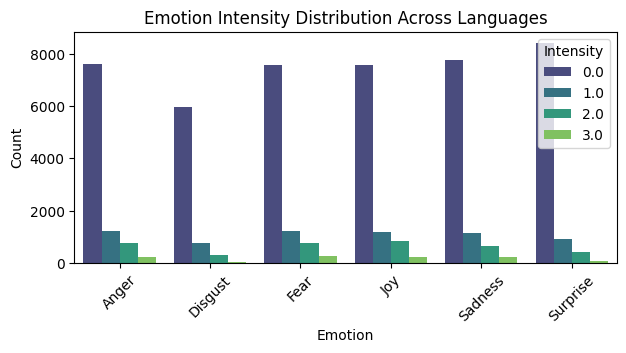

In [49]:
# 1. Emotion Intensity Distribution per Language
plt.figure(figsize=(7, 3))
sns.countplot(data=melted_df, x='Emotion', hue='Intensity', palette='viridis')
plt.title('Emotion Intensity Distribution Across Languages')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.legend(title='Intensity')
plt.xticks(rotation=45)
plt.show()

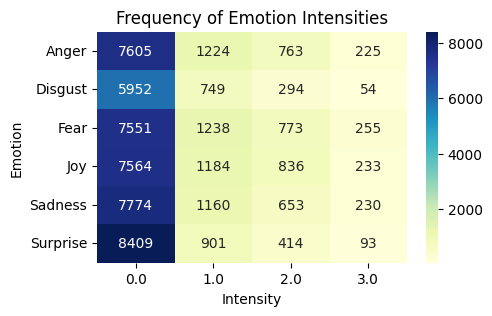

In [50]:
# 2. Emotion Intensity Heatmap
heatmap_data = melted_df.pivot_table(
    index='Emotion', 
    columns='Intensity', 
    aggfunc='size', 
    fill_value=0
)
plt.figure(figsize=(5, 3))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Emotion Intensities')
plt.show()

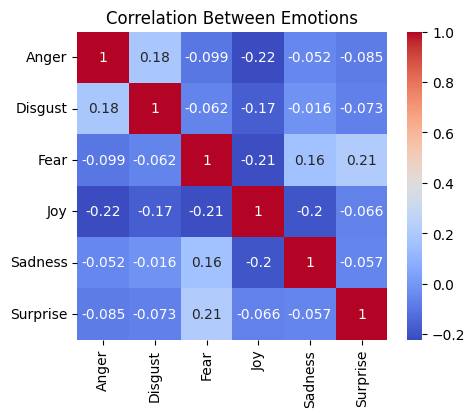

In [51]:
# 3. Correlation Matrix
emotion_intensity_df = full_df[['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']]
corr = emotion_intensity_df.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Emotions')
plt.show()

<ipython-input-52-acc985d92fdf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted_df, x='Emotion', y='Intensity', hue='language', ci='sd')


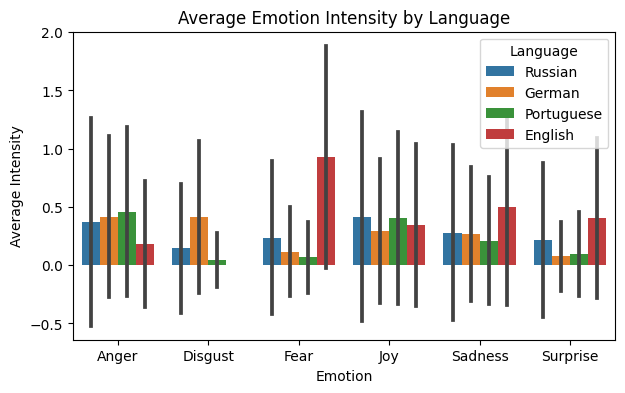

In [52]:
# 4. Emotion Intensity Across Languages
plt.figure(figsize=(7, 4))
sns.barplot(data=melted_df, x='Emotion', y='Intensity', hue='language', ci='sd')
plt.title('Average Emotion Intensity by Language')
plt.xlabel('Emotion')
plt.ylabel('Average Intensity')
plt.legend(title='Language')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


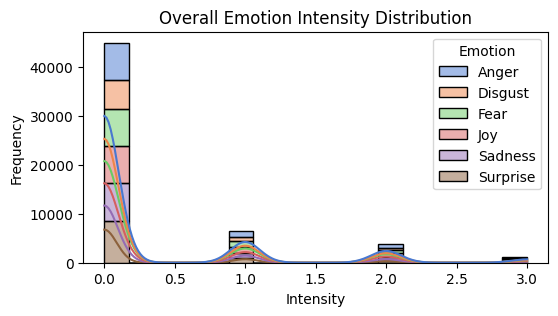

In [53]:
# 5. Overall Intensity Distribution
plt.figure(figsize=(6, 3))
sns.histplot(data=melted_df, x='Intensity', kde=True, hue='Emotion', multiple='stack', palette='muted')
plt.title('Overall Emotion Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

## Separately

In [34]:
dev_ptbr.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise,language
0,ptbr_dev_track_b_00001,Pelo simples motivo que eu existo. Acho que es...,NaN,NaN,NaN,NaN,NaN,NaN,Portuguese
1,ptbr_dev_track_b_00002,ai vi tua irmã ontem mas eu tava mt louca na h...,NaN,NaN,NaN,NaN,NaN,NaN,Portuguese
2,ptbr_dev_track_b_00003,O mandamento é a sedimentação da moral cristã ...,NaN,NaN,NaN,NaN,NaN,NaN,Portuguese
3,ptbr_dev_track_b_00004,"fiz um post pro bailey, mas to com vergonha pq...",NaN,NaN,NaN,NaN,NaN,NaN,Portuguese
4,ptbr_dev_track_b_00005,"É muuuito quente, parecido com Mato Grosso no ...",NaN,NaN,NaN,NaN,NaN,NaN,Portuguese


📊 Visualizing dataset: train_rus


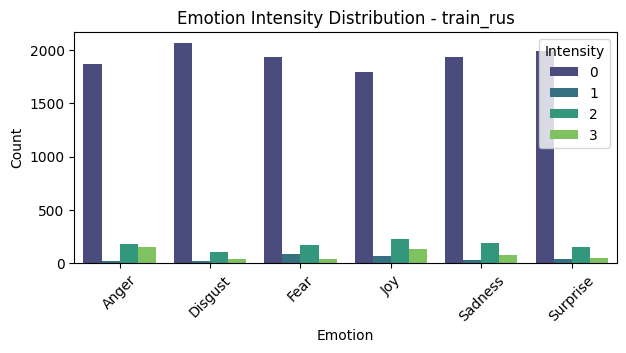

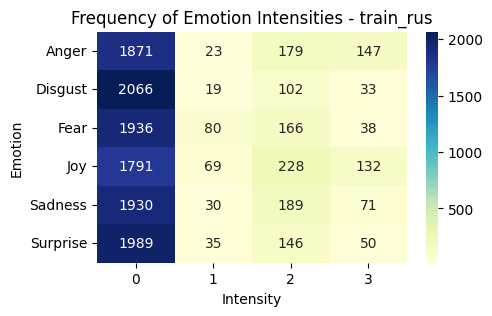

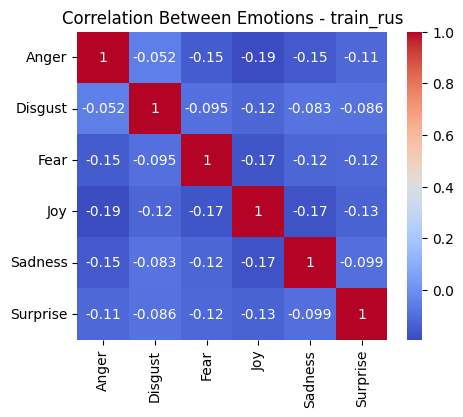

<ipython-input-54-87863990f721>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted_df, x='Emotion', y='Intensity', ci='sd')


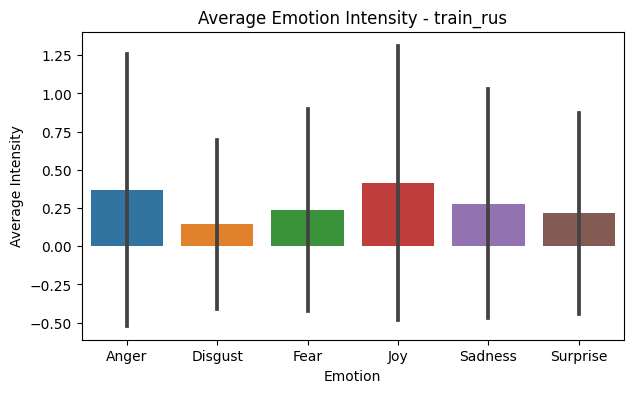

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


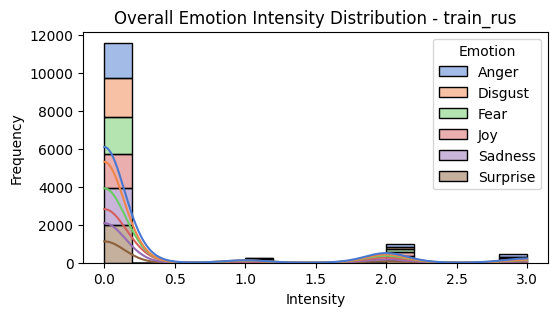

📊 Visualizing dataset: train_deu


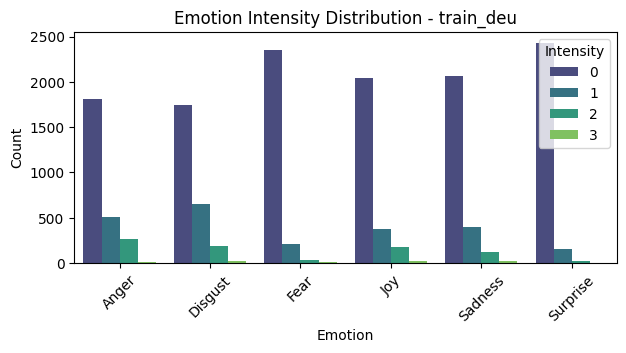

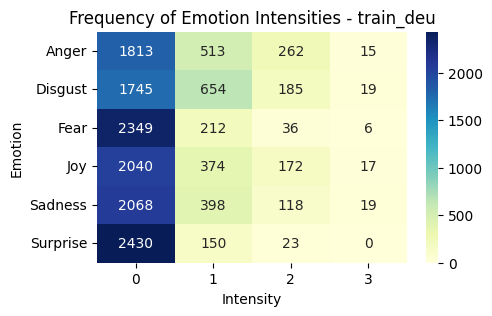

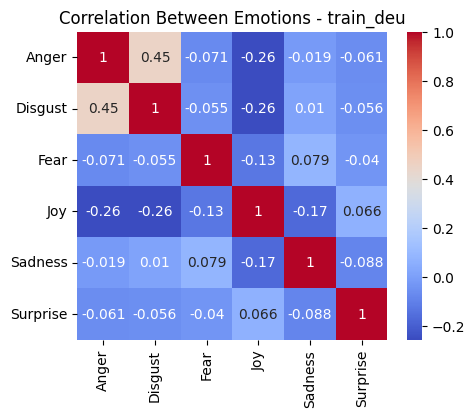

<ipython-input-54-87863990f721>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted_df, x='Emotion', y='Intensity', ci='sd')


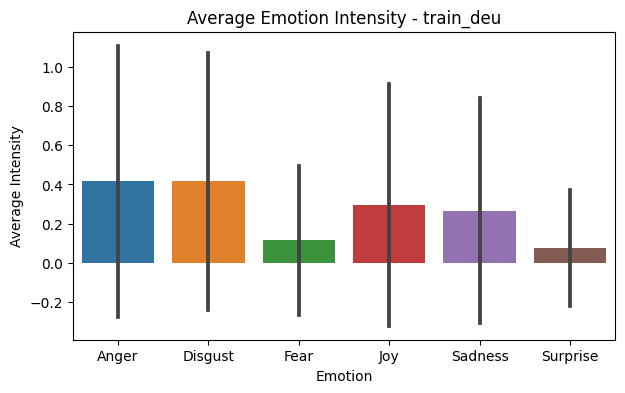

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


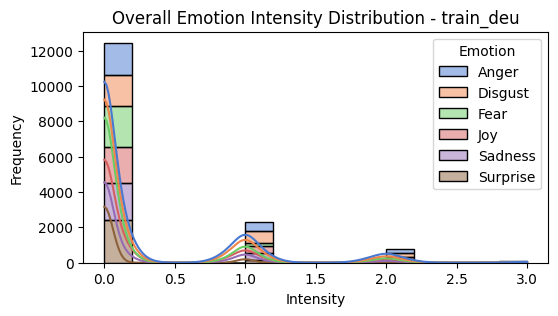

📊 Visualizing dataset: train_ptbr


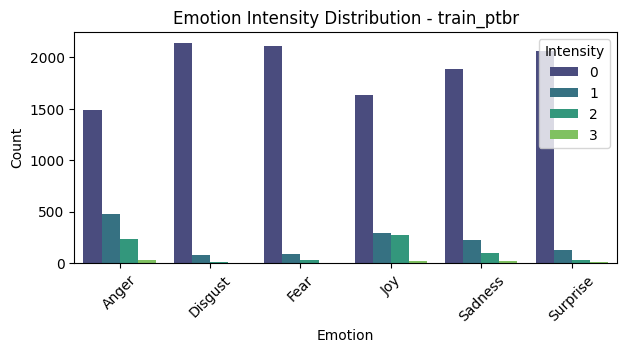

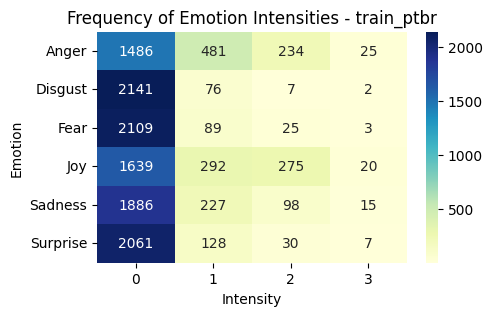

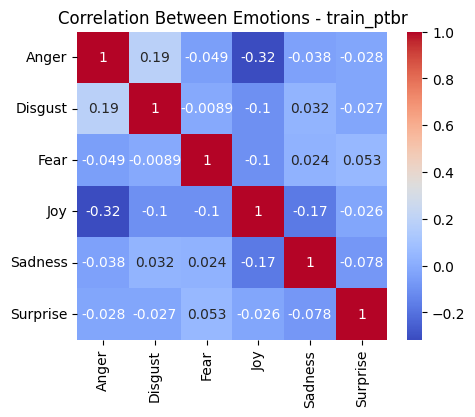

<ipython-input-54-87863990f721>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted_df, x='Emotion', y='Intensity', ci='sd')


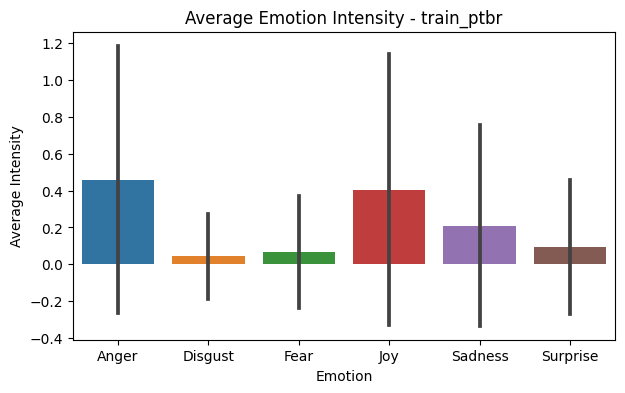

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


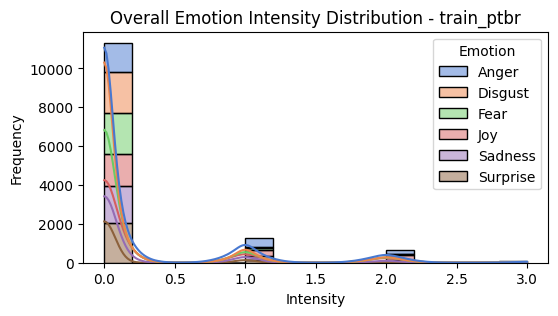

⚠️ Column 'Disgust' not found in dataset. Adding it with default value 0.
📊 Visualizing dataset: train_eng


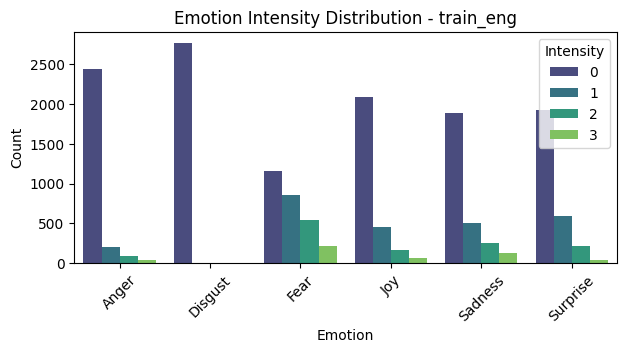

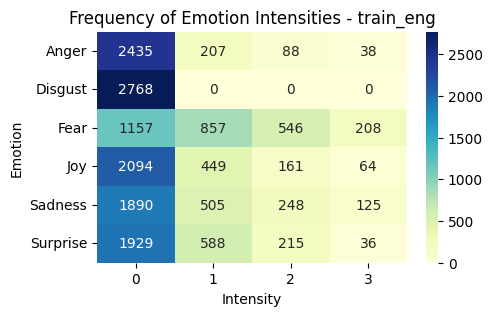

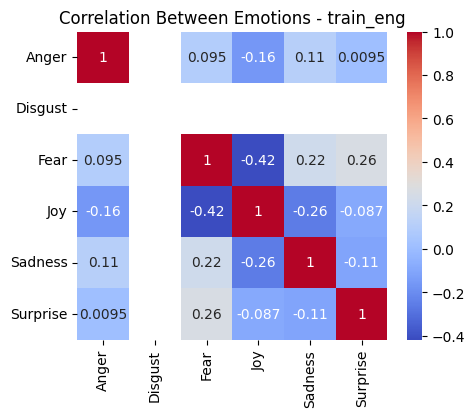

<ipython-input-54-87863990f721>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted_df, x='Emotion', y='Intensity', ci='sd')


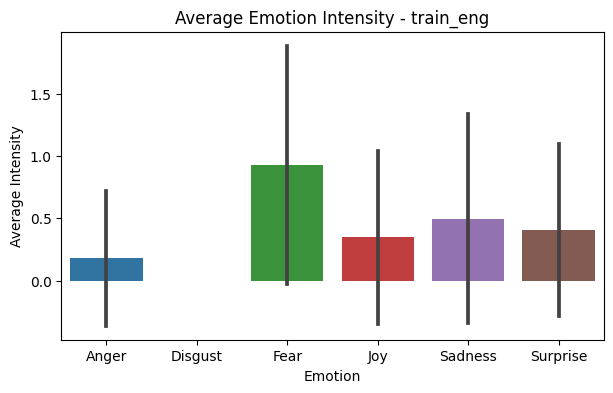

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


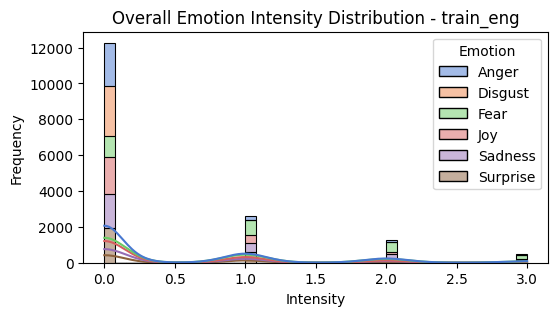

In [54]:
# Define the expected emotion columns
EXPECTED_EMOTIONS = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']

def ensure_emotion_columns(df):
    """
    Ensures that all expected emotion columns are present in the dataframe.
    Missing columns will be added with a default value of 0.
    
    Parameters:
        df (pd.DataFrame): Emotion dataset
    
    Returns:
        pd.DataFrame: Updated dataset with all emotion columns
    """
    for col in EXPECTED_EMOTIONS:
        if col not in df.columns:
            print(f"⚠️ Column '{col}' not found in dataset. Adding it with default value 0.")
            df[col] = 0
    return df


def visualize_emotion_data(df, dataset_name):
    """
    Visualizes emotion intensity data for a given dataset.
    
    Parameters:
        df (pd.DataFrame): Emotion dataset
        dataset_name (str): Name of the dataset (e.g., 'train_rus')
    """
    # Ensure dataset has all required columns
    df = ensure_emotion_columns(df)
    
    # Melt the dataframe for easier plotting
    melted_df = df.melt(
        id_vars=['id', 'text'], 
        value_vars=EXPECTED_EMOTIONS,
        var_name='Emotion', 
        value_name='Intensity'
    )
    
    print(f"📊 Visualizing dataset: {dataset_name}")
    
    # 1. Emotion Intensity Distribution
    plt.figure(figsize=(7, 3))
    sns.countplot(data=melted_df, x='Emotion', hue='Intensity', palette='viridis')
    plt.title(f'Emotion Intensity Distribution - {dataset_name}')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.legend(title='Intensity')
    plt.xticks(rotation=45)
    plt.show()
    
    # 2. Emotion Intensity Heatmap
    heatmap_data = melted_df.pivot_table(
        index='Emotion', 
        columns='Intensity', 
        aggfunc='size', 
        fill_value=0
    )
    plt.figure(figsize=(5, 3))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'Frequency of Emotion Intensities - {dataset_name}')
    plt.show()
    
    # 3. Correlation Matrix
    emotion_intensity_df = df[EXPECTED_EMOTIONS]
    corr = emotion_intensity_df.corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Between Emotions - {dataset_name}')
    plt.show()
    
    # 4. Average Emotion Intensity
    plt.figure(figsize=(7, 4))
    sns.barplot(data=melted_df, x='Emotion', y='Intensity', ci='sd')
    plt.title(f'Average Emotion Intensity - {dataset_name}')
    plt.xlabel('Emotion')
    plt.ylabel('Average Intensity')
    plt.show()
    
    # 5. Overall Intensity Distribution
    plt.figure(figsize=(6, 3))
    sns.histplot(data=melted_df, x='Intensity', kde=True, hue='Emotion', multiple='stack', palette='muted')
    plt.title(f'Overall Emotion Intensity Distribution - {dataset_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()


# List of datasets with their names
datasets = {
    'train_rus': train_rus,
    'train_deu': train_deu,
    'train_ptbr': train_ptbr,
    'train_eng': train_eng
}

# Loop through datasets and visualize each one
for name, dataset in datasets.items():
    visualize_emotion_data(dataset, name)